<a href="https://colab.research.google.com/github/AhmedElbossily/3D-Voronoi-Diagram-generation-code-using-modified-MPS/blob/master/Statistics_Second_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test if two samples are drawn from the same population distribution (use parametric and non-parametric tests where appropriate)

- In the following example, two samples with size (41) were randomly selected from a population.

**Z Test**

- The z test was performed with 5% significance to test the null hypothesis that there is no difference between two samples mean.
- For 5% significace Z critical is -/+ 1.96 for two-tails.
- Z  calculated was found within the Z critical interval.
- Thus, Failed to reject the null hypothesis.

**F Test**

- The F test was performed with 5% significance to test the null hypothesis that there is no difference between two samples variance.
- For 5% significace F critical is 1.875 for two-tails (alpha=2.5%).
- F  calculated was found lower than the critical value.
- Thus, Failed to reject the null hypothesis.

In [106]:
import numpy as np
from math import sqrt
# Parameters
seed_number=1
population_size = 2000
sample_1_size =41
sample_2_size=41
# make this example reproducible
np.random.seed(seed_number)
#generate sample of 2000 values that follow a normal distribution 
population = np.random.normal(loc=0, scale=1, size=population_size)
# get the the two samples
rd1 = np.random.choice(population, sample_1_size)
rd2 = np.random.choice([i for i in population if i not in rd1], sample_2_size)
########### Z test ##########
print("Z TEST")
z= (rd1.mean()-rd2.mean())/sqrt((rd1.std()**2/sample_1_size)+(rd2.std()**2/sample_2_size))
print("z calculated:",z)
if (z> -1.96 and z<1.96):
  print("Failed to reject null hypothesis that there is no difference in two samples mean")
else:
  print("Reject null hypothesis that there is no difference in two samples mean")
########### F test ##########
print("\nF TEST")
F_calculated = max(rd1.std(), rd2.std())**2/min(rd1.std(), rd2.std())**2
print("F calculated: ", F_calculated)
df1=max(sample_1_size,sample_2_size)-1
df2=min(sample_2_size,sample_2_size)-1
print("F critical: 1.875 From F table of alpha (0.05/2) and 40 df- two tailed")
if (F_calculated<1.875):
  print("Failed to reject null hypothesis that there is no difference in two samples variance")
else:
  print("Reject null hypothesis that there is no difference in two samples variance")

Z TEST
z calculated: 0.40538351186444826
Failed to reject null hypothesis that there is no difference in two samples mean

F TEST
F calculated:  1.040501292585794
F critical: 1.875 From F table of alpha (0.05/2) and 40 df- two tailed
Failed to reject null hypothesis that there is no difference in two samples variance


# Test if two variables are statistically independent 

**Using Chui Square test**

In [107]:
import numpy as np
from scipy.stats import chi2_contingency

alpha = 0.05
variables = np.array([[13,8], [5,11]])
chi2_v, p, dof, ex = chi2_contingency(variables, correction=False)
if (p < alpha):
  print("Reject the null hypothesis that that the two variables are independent.")
else:
  print("Failed to reject the null hypothesis that the two variables are independent")

Failed to reject the null hypothesis that the two variables are independent


# Demonstrate Bayes theorem by estimating the mean of a Binomial distribution (don't need to use any MCMC software)

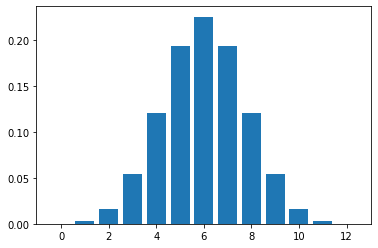

In [3]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 12
p = 0.5
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist)
plt.show()


# Code your own simple linear regression model, validate it with in-sample and out-of-sample metrics

Test passed: number of total rows equal after splitting!
Number of samples more than 30: Using Z distribution table
Model valide: Data mean inside 95% confidence interval of model
Number of samples less than 30: Using t distribution table
Model valide: Data mean inside 95% confidence interval of model
RMSE Training:  0.2604871946963474
RMSE Testing:  0.2384363057835347


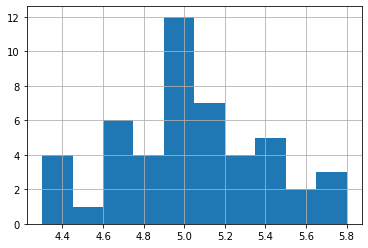

In [4]:
# Linear Regression model
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import t

# splite Data 
def dataset_splitter(df):
    df = df.iloc[np.random.permutation(len(df))]
    total_values = len (df)
    sample_size = round(total_values * 0.8)
    train = df[:sample_size].reset_index(drop = True)
    test = df[sample_size:].reset_index(drop = True)
    assert len(train) + len(test) == len(df)
    print("Test passed: number of total rows equal after splitting!")
    return train, test
  
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
  
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
	x_mean, y_mean = dataset.mean()
	b1 = covariance(dataset["X"], x_mean, dataset["Y"], y_mean) / variance(dataset["X"], x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

def validate(length, SE, mean, d_mean):
  if(length<30):
    print("Number of samples less than 30: Using t distribution table")
    Critical_value = t.ppf(0.95, length-1)
    upper_limit = mean + Critical_value*SE
    lower_limit = mean- Critical_value*SE
    if((d_mean < upper_limit) and (d_mean >lower_limit)):
      print("Model valide: Data mean inside 95% confidence interval of model")
    else:
      print("Model Invalide: Data mean outside 95% confidence interval of model")

  else:
    print("Number of samples more than 30: Using Z distribution table")
    upper_limit = mean+1.96*SE
    lower_limit = mean-1.96*SE
    if((d_mean < upper_limit) and (d_mean >lower_limit)):
      print("Model valide: Data mean inside 95% confidence interval of model")
    else:
      print("Model Invalide: Data mean outside 95% confidence interval of model")

np.random.seed(seed=1)
# load and prepare data
df = pd.read_csv("./Iris_Setosa.csv")
df["Y"].hist()
# Splite Data into training and testing
d_train, d_test =dataset_splitter(df)
# Get the Linear coefficients 
b0,b1 = coefficients(d_train)
# Get the prediction from the training data
pred_training = b0+b1*d_train["X"]
pred_training_SE = pred_training.std()/sqrt(len(pred_training))
validate(len(pred_training), pred_training_SE, pred_training.mean(), d_train["Y"].mean())
# Get the prediction from The Testing data
pred_testing = b0+b1*d_test["X"]
pred_testing_SE = pred_testing.std()/sqrt(len(pred_testing))
validate(len(pred_testing), pred_testing_SE, pred_testing.mean(), d_test["Y"].mean())

# Calculate RMSE
print("RMSE Training: ", rmse_metric(d_train["Y"], pred_training))
print("RMSE Testing: ", rmse_metric(d_test["Y"], pred_testing))


# Perform a hypothesis test to test if a distribution population mean value is equal to 50 (make any additional assumptions required). Calculate the test statistic and p-value yourself. 

In [5]:
from math import sqrt
n=40 #number of samples
H_mean =50 # hypothesis mean
mean=45 # Sample mean
std = 20 # Sample Standard diviation
alpha=0.05 # Confidence level 95%

SE = std/float(sqrt(n))
z = (mean-H_mean)/SE
print("z Value: ",z)
# From the table for z =-1.5811
p_value = 1.0 - 0.0571
if (p_value>alpha):
  print("Failed to reject the null hypothesis")
else:
  print("Reject the null hypothesis")
  

z Value:  -1.5811388300841898
Failed to reject the null hypothesis
